In [2]:
#!python
from numpy import *
import pylab as p
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "cursive"
plt.rcParams['font.size'] = '12'
#CAUTIOUS LOVERS
# Definition of parameters
a = -3 
b = 4
c = 2
d = -5
X0 = array([-3/4, 5/4])

def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([a*X[0] + b*X[1],
                  c*X[0] + d*X[1]])


In [3]:
#!python
X_f0 = array([0.,  0.])
all(dX_dt(X_f0) == zeros(2))  # => True


True

In [4]:
#!python
from scipy import integrate
t = linspace(0, 10,  10000)              # time
# initials conditions: 10 rabbits and 5 foxes

X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'


'Integration successful.'

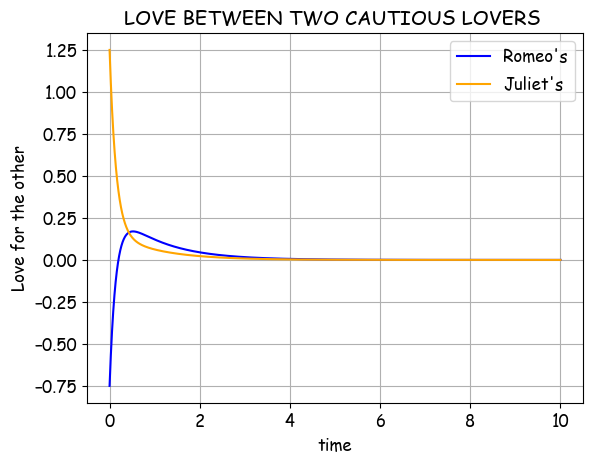

In [5]:
#!python
romeo, juliet  = X.T
f1 = p.figure()
p.plot(t, romeo, '-', color='blue', label='Romeo\'s')
p.plot(t, juliet, '-', color='orange', label='Juliet\'s')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('Love for the other')
p.title('LOVE BETWEEN TWO CAUTIOUS LOVERS ')
f1.savefig('./image/plot3.1.png')


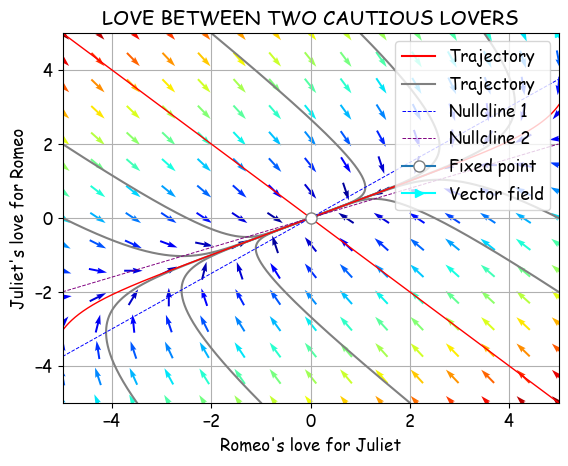

In [6]:


f2 = p.figure()

# -------------------------------------------------------
# plot trajectories
values = array([[-1,-5], 
              [-3.5, -5], 
              [2, -5], 
              [-5, 2],
              #  [-2, 2.1], 
              #  [1.7, -1.6], 
               [-5, 0]])

for v in values:                        # starting point
    X, infodict = integrate.odeint(dX_dt, v, t, full_output=True)
    p.plot(X[:, 0], X[:, 1], lw=1.5, color='gray')
    X, infodict = integrate.odeint(dX_dt, -v, t, full_output=True)
    p.plot(X[:, 0], X[:, 1], lw=1.5, color='gray')
valuesred = array([[-5, 5],
              [5,5]])
for v in valuesred:
       X, infodict = integrate.odeint(dX_dt, -v, t, full_output=True)
       p.plot(X[:, 0], X[:, 1], lw=1, color='red')
       X, infodict = integrate.odeint(dX_dt, v, t, full_output=True)
       p.plot(X[:, 0], X[:, 1], lw=1, color='red')

p.plot(5,5,'r-',label='Trajectory')
p.plot(5,5,color='gray',label='Trajectory')
# -------------------------------------------------------
# define a grid and compute direction at each point
# ymax = p.ylim(ymin=0)[1]                        # get axis limits
# xmax = p.xlim(xmin=0)[1]
xmax = 5
ymax = 5

nb_points = 15

x = linspace(-xmax, xmax, nb_points)
y = linspace(-ymax, ymax, nb_points)

X1, Y1 = meshgrid(x, y)                       # create a grid
# compute growth rate on the gridt
DX1, DY1 = dX_dt([X1, Y1])
M = (hypot(DX1, DY1))                           # Norm of the growth rate
M[M == 0] = 1.                                 # Avoid zero division errors
DX1 /= M                                        # Normalize each arrows
DY1 /= M

# -------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed

p.title('LOVE BETWEEN TWO CAUTIOUS LOVERS')
p.plot(x, -a*x/b,  'b--', lw=0.7, label='Nullcline 1')
p.plot(x, -c*x/d,  '--',color='purple', lw=0.7, label='Nullcline 2')
p.plot(0, 0, marker="o", markersize=8,
       markeredgecolor="gray", markerfacecolor="white", label='Fixed point')
p.plot(5, 5, '->',color='cyan' , label='Vector field')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Romeo\'s love for Juliet')
p.ylabel('Juliet\'s love for Romeo')
p.legend(loc='upper right')
p.grid()
p.xlim(-xmax, xmax)
p.ylim(-ymax, ymax)
f2.savefig('./image/pp3.1.png')
